# PERINATAL ENCOUNTERS SIMULATION AND DATASET CREATION

<p>Este notebook se centrará en crear un dataset con los datos que en teoría recogen los especialistas cuando una mujer embarazada acude a una cita de seguimiento o a una urgencia. Los datos sintéticos han sido creados con <a href="https://synthea.mitre.org/about">synthea</a>.</p>

## DESCRIPCIÓN DE LOS DATASETS

<ul>
    <li>Careplans: datasets que recoge los planes del cuidado, con códigos y descripciones de tratamientos (ej. cuidado antenatal). </li>
    <li>Conditions: registra condiciones médicas diagnosticadas para los pacientes.</li>
    <li>Observations: contiene observaciones clínicas, como altura, peso, IMC y signos vitales.</li>
    <li>Patients: información demográfoca y general de los pacientes.</li>
</ul>


**Estrategia**

Vamos a filtrar datos para mujeres _embarazadas_ basándonos en las condiciones relacionadas con el embarazo y generar un dataset consolidado conlas características solicitadas. Esto incluirá <code>patient_id</code>, datos clínicos y condiciones de salud específicas.

In [8]:
import  pandas as pd
from datetime import datetime

careplans = pd.read_csv('careplans.csv')
conditions = pd.read_csv('conditions.csv')
observations = pd.read_csv('observations.csv')
patients = pd.read_csv('patients.csv')

### Lectura de los cuatro datasets

In [11]:
careplans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1822 entries, 0 to 1821
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 1822 non-null   object 
 1   START              1822 non-null   object 
 2   STOP               961 non-null    object 
 3   PATIENT            1822 non-null   object 
 4   ENCOUNTER          1822 non-null   object 
 5   CODE               1822 non-null   int64  
 6   DESCRIPTION        1822 non-null   object 
 7   REASONCODE         571 non-null    float64
 8   REASONDESCRIPTION  571 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 128.2+ KB


In [13]:
careplans.head()

,Id,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION,REASONCODE,REASONDESCRIPTION
0,01612794-cb3e-02ac-1e6f-857a03b9bc69,2018-11-18,2018-12-13,d778d02c-1b71-582e-0c64-e9ce715996fc,f549ca01-9e59-e01c-0b2d-c583240c3ab1,225358003,Wound care (regime/therapy),284549007.0,Laceration of hand (disorder)
1,7ca9b0a8-2941-8c67-0778-0f132ea1a29e,2022-10-06,2023-02-02,d778d02c-1b71-582e-0c64-e9ce715996fc,aa60e9ca-6271-8103-97ad-052099369212,53950000,Respiratory therapy (procedure),NaN,NaN
2,2f17bca4-8478-8a83-b2bd-33a2d53485ce,2024-03-08,2024-04-19,958cbaed-4a32-40ff-f2ee-d55edc4f7611,e839b319-4afe-187b-219c-374d7529e79b,47387005,Head injury rehabilitation (regime/therapy),62564004.0,Concussion with loss of consciousness (disorder)
3,ae9b05d7-b88b-0a25-5f98-bcb2101baea9,2024-09-19,NaN,d778d02c-1b71-582e-0c64-e9ce715996fc,0a723901-5534-ddd3-dfd3-4bee300feb41,134435003,Routine antenatal care (regime/therapy),NaN,NaN
4,c6e88795-3d78-21a4-3ffa-12bbf59e7ae9,2014-03-25,NaN,ff3708b4-748c-ae52-2430-bc60dd9fb5dd,dbe4c0db-e925-25a1-d666-1a4b962aa43b,276239002,Therapy (regime/therapy),NaN,NaN


In [15]:
conditions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14480 entries, 0 to 14479
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   START        14480 non-null  object
 1   STOP         10628 non-null  object
 2   PATIENT      14480 non-null  object
 3   ENCOUNTER    14480 non-null  object
 4   SYSTEM       14480 non-null  object
 5   CODE         14480 non-null  int64 
 6   DESCRIPTION  14480 non-null  object
dtypes: int64(1), object(6)
memory usage: 792.0+ KB


In [17]:
conditions.head()

,START,STOP,PATIENT,ENCOUNTER,SYSTEM,CODE,DESCRIPTION
0,2014-10-27,2016-11-07,958cbaed-4a32-40ff-f2ee-d55edc4f7611,9c7664c0-33a3-6778-7845-7b08030a230c,http://snomed.info/sct,314529007,Medication review due (situation)
1,2014-12-18,2015-12-24,d778d02c-1b71-582e-0c64-e9ce715996fc,3682fee4-9f43-f8ae-bc5c-8a0b8b42528f,http://snomed.info/sct,314529007,Medication review due (situation)
2,2015-05-01,2015-05-11,d778d02c-1b71-582e-0c64-e9ce715996fc,c77234be-e24b-5ebf-0e7a-0c835da53642,http://snomed.info/sct,195662009,Acute viral pharyngitis (disorder)
3,2015-09-13,2015-10-02,d778d02c-1b71-582e-0c64-e9ce715996fc,dec60578-6d45-e7a1-ccbf-5c8a031f93c7,http://snomed.info/sct,444814009,Viral sinusitis (disorder)
4,2015-12-24,2015-12-31,d778d02c-1b71-582e-0c64-e9ce715996fc,99b291c0-18a3-afd1-f002-cb3bf4367b4e,http://snomed.info/sct,66383009,Gingivitis (disorder)


In [19]:
observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280211 entries, 0 to 280210
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   DATE         280211 non-null  object
 1   PATIENT      280211 non-null  object
 2   ENCOUNTER    272606 non-null  object
 3   CATEGORY     272606 non-null  object
 4   CODE         280211 non-null  object
 5   DESCRIPTION  280211 non-null  object
 6   VALUE        280211 non-null  object
 7   UNITS        204565 non-null  object
 8   TYPE         280211 non-null  object
dtypes: object(9)
memory usage: 19.2+ MB


In [21]:
observations.head()

,DATE,PATIENT,ENCOUNTER,CATEGORY,CODE,DESCRIPTION,VALUE,UNITS,TYPE
0,2015-11-02T23:58:08Z,958cbaed-4a32-40ff-f2ee-d55edc4f7611,75f6d06e-01e4-999f-656e-a4def079a8f6,vital-signs,8302-2,Body Height,146.5,cm,numeric
1,2015-11-02T23:58:08Z,958cbaed-4a32-40ff-f2ee-d55edc4f7611,75f6d06e-01e4-999f-656e-a4def079a8f6,vital-signs,72514-3,Pain severity - 0-10 verbal numeric rating [Sc...,1.0,{score},numeric
2,2015-11-02T23:58:08Z,958cbaed-4a32-40ff-f2ee-d55edc4f7611,75f6d06e-01e4-999f-656e-a4def079a8f6,vital-signs,29463-7,Body Weight,41.8,kg,numeric
3,2015-11-02T23:58:08Z,958cbaed-4a32-40ff-f2ee-d55edc4f7611,75f6d06e-01e4-999f-656e-a4def079a8f6,vital-signs,39156-5,Body mass index (BMI) [Ratio],19.5,kg/m2,numeric
4,2015-11-02T23:58:08Z,958cbaed-4a32-40ff-f2ee-d55edc4f7611,75f6d06e-01e4-999f-656e-a4def079a8f6,vital-signs,59576-9,Body mass index (BMI) [Percentile] Per age and...,67.5,%,numeric


In [23]:
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   364 non-null    object 
 1   BIRTHDATE            364 non-null    object 
 2   DEATHDATE            144 non-null    object 
 3   SSN                  364 non-null    object 
 4   DRIVERS              364 non-null    object 
 5   PASSPORT             336 non-null    object 
 6   PREFIX               354 non-null    object 
 7   FIRST                364 non-null    object 
 8   MIDDLE               292 non-null    object 
 9   LAST                 364 non-null    object 
 10  SUFFIX               6 non-null      object 
 11  MAIDEN               219 non-null    object 
 12  MARITAL              278 non-null    object 
 13  RACE                 364 non-null    object 
 14  ETHNICITY            364 non-null    object 
 15  GENDER               364 non-null    obj

In [25]:
patients.head()

,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,MIDDLE,LAST,...,CITY,STATE,COUNTY,FIPS,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,INCOME
0,958cbaed-4a32-40ff-f2ee-d55edc4f7611,2003-10-13,NaN,999-46-5780,S99985773,X43751887X,Ms.,Sol312,Ciara810,Baumbach677,...,Tyngsborough,Massachusetts,Middlesex County,NaN,0,42.678887,-71.466652,83748.67,8386.12,847165
1,d778d02c-1b71-582e-0c64-e9ce715996fc,2004-12-09,NaN,999-44-8153,S99922963,X17785689X,Ms.,Irma773,Terresa418,Shields502,...,Barnstable,Massachusetts,Barnstable County,25001.0,2648,41.712246,-70.451110,80934.70,70863.00,62412
2,ff3708b4-748c-ae52-2430-bc60dd9fb5dd,1991-09-05,NaN,999-31-9506,S99963368,X48163920X,Mrs.,Rocio28,Ángela136,Bermúdez789,...,Chicopee,Massachusetts,Hampden County,25013.0,1020,42.175006,-72.570417,10853.87,707739.51,1348
3,8cc46582-8727-0024-6010-c5e7e2943578,2000-07-25,NaN,999-55-8680,S99950926,X19763814X,Ms.,Lelah386,Crystal2,Leannon79,...,Worcester,Massachusetts,Worcester County,25027.0,1605,42.192066,-71.751869,122151.80,144375.81,95771
4,6da671b7-6462-2ced-5b86-5b0fced4308b,1974-02-04,NaN,999-31-4155,S99970004,X2187110X,Mrs.,Olympia319,Pamula578,Huels583,...,Revere,Massachusetts,Suffolk County,25025.0,2151,42.461726,-71.000002,186763.75,853299.76,26068


Como podemos observar tienen columnas en común que podemos usar para mapear los datos de interés y construiur nuestro dataset final. Podemos observar que 
tratan con fechas anteriores a las que estamos manejando en el resto de notebooks (septiembre de 2024) y también encomtramos valores NaN,  que habrá que 
hacer manejo de ellos, tal y como hemos hecho anteriormente.

**Filtrado de los datos**

In [550]:
#1. Filtrar datos relacionados con el embarazo en conditions
pregnancy_conditions = conditions[conditions['DESCRIPTION'].str.contains(
    "pregnancy|antenatal|gestation", case=False, na=False)]

#2. Obtener IDs de pacientes relacionados con embarazo
pregnancy_patients = pregnancy_conditions['PATIENT'].unique()

#3. Filtrar pacientes que coinciden con los IDs y están vivas
pregnant_patientsAlive = patients[(patients['Id'].isin(
    pregnancy_patients)) & (patients['DEATHDATE'].isna())]

#4. Filtramos observaciones de interés: los signos vitales, peso, altura, IMC y pruebas de glucosa. 
relevant_observations=observations[observations['DESCRIPTION'].str.contains(
    "Body Height|Body Weight|Body mass index|Heart rate|Diastolic Blood Pressure|Systolic Blood Pressure|Glucose| Body temperature", case=False, na=False)]

#5. Filtrar observaciones para las pacientes embarazadas
pregnancy_observations = relevant_observations[
relevant_observations['PATIENT'].isin(pregnancy_patients)]

#6. Unir los datos para crear dataset
encounter_data = pregnancy_observations.merge(
    pregnant_patientsAlive,
    left_on='PATIENT',
    right_on='Id',
    suffixes=('_observation', '_patient')
)

#7.Seleccionar colummnas relevantes para el análisis
encounter_data_filtered = encounter_data[[
    'PATIENT', 'DESCRIPTION', 'VALUE', 'UNITS', 'DATE', 'BIRTHDATE', 'GENDER', 'RACE', 'ETHNICITY'
]]
#8. Añadir info del tipo de consulta desde careplans

reason = careplans[['ENCOUNTER', 'DESCRIPTION']].rename(columns={'DESCRIPTION': 'ENCOUNTER_TYPE'})
encounter_data_reason = encounter_data.merge(
    reason, 
    left_on='ENCOUNTER', 
    right_on='ENCOUNTER', 
    how='left'
)
#9. Filtrar columnas relevantes
encounter_data_reasonFiltered = encounter_data_reason[[
    'PATIENT', 'DESCRIPTION', 'VALUE', 'UNITS', 'DATE', 'BIRTHDATE', 'GENDER', 'RACE', 'ETHNICITY'
]]



In [552]:
encounter_data_reasonFiltered.head()

,PATIENT,DESCRIPTION,VALUE,UNITS,DATE,BIRTHDATE,GENDER,RACE,ETHNICITY
0,958cbaed-4a32-40ff-f2ee-d55edc4f7611,Body Height,146.5,cm,2015-11-02T23:58:08Z,2003-10-13,F,asian,nonhispanic
1,958cbaed-4a32-40ff-f2ee-d55edc4f7611,Body Weight,41.8,kg,2015-11-02T23:58:08Z,2003-10-13,F,asian,nonhispanic
2,958cbaed-4a32-40ff-f2ee-d55edc4f7611,Body mass index (BMI) [Ratio],19.5,kg/m2,2015-11-02T23:58:08Z,2003-10-13,F,asian,nonhispanic
3,958cbaed-4a32-40ff-f2ee-d55edc4f7611,Body mass index (BMI) [Percentile] Per age and...,67.5,%,2015-11-02T23:58:08Z,2003-10-13,F,asian,nonhispanic
4,958cbaed-4a32-40ff-f2ee-d55edc4f7611,Diastolic Blood Pressure,81.0,mm[Hg],2015-11-02T23:58:08Z,2003-10-13,F,asian,nonhispanic


In [554]:
def calculate_age(birthdate, observation_date):
    """
    Función que calcula la edad del paciente a la fecha de la consulta.
    ARGS:
        - Birthdate: fecha de  nacimiento.
        - Observation_date: fecha de la consulta.
    RETURNS:
        Valor de la edad calculada.
    """
    try:
        if isinstance(birthdate, str):
            birthdate = datetime.strptime(birthdate.split('T')[0], '%Y-%m-%d')
        if isinstance(observation_date, str):
            observation_date = datetime.strptime(observation_date.split('T')[0], '%Y-%m-%d')
        age = observation_date.year - birthdate.year - ((observation_date.month, observation_date.day) < (birthdate.month, birthdate.day))
        return age if age >= 0 else None  # Devuelve None si la edad es negativa
    except Exception as e:
        return None  # Manejar errores devolviendo None


In [556]:
encounter_data_reasonFiltered['Age'] = encounter_data_reasonFiltered.apply(
    lambda row: calculate_age(row['BIRTHDATE'], row['DATE']), axis=1)


C:\Users\virginia.anton\AppData\Local\Temp\ipykernel_9652\3490422321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  encounter_data_reasonFiltered['Age'] = encounter_data_reasonFiltered.apply(


In [558]:
#Creamos un conjunto de pacientes con condiciones relacionadas a la diabetes
diabetes_patients = set(conditions[conditions['DESCRIPTION'].str.contains("diabetes", case=False, na=False)]['PATIENT'])

#Añadimos columna  para indicar si el paciente tiene diabetes
encounter_data_reasonFiltered['HAS_DIABETES'] = encounter_data_reasonFiltered['PATIENT'].apply(
    lambda x: 1 if x in diabetes_patients else 0
)


C:\Users\virginia.anton\AppData\Local\Temp\ipykernel_9652\4025760185.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  encounter_data_reasonFiltered['HAS_DIABETES'] = encounter_data_reasonFiltered['PATIENT'].apply(


In [560]:
#Añadimos el tipo de tratamiento a llevar para la embarazada
patient_careplan= careplans[
careplans['PATIENT'].isin(encounter_data_reasonFiltered['PATIENT'])]
encounter_data_reasonFiltered['CAREPLAN'] = patient_careplan['DESCRIPTION']
encounter_data_reasonFiltered.head()

C:\Users\virginia.anton\AppData\Local\Temp\ipykernel_9652\1123447972.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  encounter_data_reasonFiltered['CAREPLAN'] = patient_careplan['DESCRIPTION']


,PATIENT,DESCRIPTION,VALUE,UNITS,DATE,BIRTHDATE,GENDER,RACE,ETHNICITY,Age,HAS_DIABETES,CAREPLAN
0,958cbaed-4a32-40ff-f2ee-d55edc4f7611,Body Height,146.5,cm,2015-11-02T23:58:08Z,2003-10-13,F,asian,nonhispanic,12,0,Wound care (regime/therapy)
1,958cbaed-4a32-40ff-f2ee-d55edc4f7611,Body Weight,41.8,kg,2015-11-02T23:58:08Z,2003-10-13,F,asian,nonhispanic,12,0,Respiratory therapy (procedure)
2,958cbaed-4a32-40ff-f2ee-d55edc4f7611,Body mass index (BMI) [Ratio],19.5,kg/m2,2015-11-02T23:58:08Z,2003-10-13,F,asian,nonhispanic,12,0,Head injury rehabilitation (regime/therapy)
3,958cbaed-4a32-40ff-f2ee-d55edc4f7611,Body mass index (BMI) [Percentile] Per age and...,67.5,%,2015-11-02T23:58:08Z,2003-10-13,F,asian,nonhispanic,12,0,Routine antenatal care (regime/therapy)
4,958cbaed-4a32-40ff-f2ee-d55edc4f7611,Diastolic Blood Pressure,81.0,mm[Hg],2015-11-02T23:58:08Z,2003-10-13,F,asian,nonhispanic,12,0,Therapy (regime/therapy)


In [562]:
#Dataset final:
encounter_data_reasonFiltered.head()

,PATIENT,DESCRIPTION,VALUE,UNITS,DATE,BIRTHDATE,GENDER,RACE,ETHNICITY,Age,HAS_DIABETES,CAREPLAN
0,958cbaed-4a32-40ff-f2ee-d55edc4f7611,Body Height,146.5,cm,2015-11-02T23:58:08Z,2003-10-13,F,asian,nonhispanic,12,0,Wound care (regime/therapy)
1,958cbaed-4a32-40ff-f2ee-d55edc4f7611,Body Weight,41.8,kg,2015-11-02T23:58:08Z,2003-10-13,F,asian,nonhispanic,12,0,Respiratory therapy (procedure)
2,958cbaed-4a32-40ff-f2ee-d55edc4f7611,Body mass index (BMI) [Ratio],19.5,kg/m2,2015-11-02T23:58:08Z,2003-10-13,F,asian,nonhispanic,12,0,Head injury rehabilitation (regime/therapy)
3,958cbaed-4a32-40ff-f2ee-d55edc4f7611,Body mass index (BMI) [Percentile] Per age and...,67.5,%,2015-11-02T23:58:08Z,2003-10-13,F,asian,nonhispanic,12,0,Routine antenatal care (regime/therapy)
4,958cbaed-4a32-40ff-f2ee-d55edc4f7611,Diastolic Blood Pressure,81.0,mm[Hg],2015-11-02T23:58:08Z,2003-10-13,F,asian,nonhispanic,12,0,Therapy (regime/therapy)


Estamos observando que se han generado pacientes embarazadas con 12 años y 11, algo que NO es lógico. Vamos a limpiarlo

In [564]:
 encounter_data_reasonFiltered =  encounter_data_reasonFiltered[
    ( encounter_data_reasonFiltered['Age'] >= 15) & (encounter_data_reasonFiltered['Age'] <= 60)
]

In [566]:
encounter_data_reasonFiltered.head()

,PATIENT,DESCRIPTION,VALUE,UNITS,DATE,BIRTHDATE,GENDER,RACE,ETHNICITY,Age,HAS_DIABETES,CAREPLAN
42,958cbaed-4a32-40ff-f2ee-d55edc4f7611,Body Height,157.6,cm,2018-11-19T23:58:08Z,2003-10-13,F,asian,nonhispanic,15,0,Routine antenatal care (regime/therapy)
43,958cbaed-4a32-40ff-f2ee-d55edc4f7611,Body Weight,54.3,kg,2018-11-19T23:58:08Z,2003-10-13,F,asian,nonhispanic,15,0,Routine antenatal care (regime/therapy)
44,958cbaed-4a32-40ff-f2ee-d55edc4f7611,Body mass index (BMI) [Ratio],21.9,kg/m2,2018-11-19T23:58:08Z,2003-10-13,F,asian,nonhispanic,15,0,Lifestyle education regarding hypertension (pr...
45,958cbaed-4a32-40ff-f2ee-d55edc4f7611,Body mass index (BMI) [Percentile] Per age and...,70.8,%,2018-11-19T23:58:08Z,2003-10-13,F,asian,nonhispanic,15,0,Routine antenatal care (regime/therapy)
46,958cbaed-4a32-40ff-f2ee-d55edc4f7611,Diastolic Blood Pressure,81.0,mm[Hg],2018-11-19T23:58:08Z,2003-10-13,F,asian,nonhispanic,15,0,Respiratory therapy (procedure)


In [568]:
encounter_data_reasonFiltered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17843 entries, 42 to 19432
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   PATIENT       17843 non-null  object
 1   DESCRIPTION   17843 non-null  object
 2   VALUE         17843 non-null  object
 3   UNITS         17843 non-null  object
 4   DATE          17843 non-null  object
 5   BIRTHDATE     17843 non-null  object
 6   GENDER        17843 non-null  object
 7   RACE          17843 non-null  object
 8   ETHNICITY     17843 non-null  object
 9   Age           17843 non-null  int64 
 10  HAS_DIABETES  17843 non-null  int64 
 11  CAREPLAN      920 non-null    object
dtypes: int64(2), object(10)
memory usage: 1.8+ MB


In [570]:
encounter_data_reasonFiltered.to_csv('synthea_data')

## ANALISIS DEL DATASET

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

import scipy.stats as stats
import seaborn as sns
from scipy.interpolate import interp1d

from datetime import date
from datetime import datetime
from datetime import timedelta

**1. Inspección inicial**

In [572]:
# Información general del dataset
encounter_data_reasonFiltered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17843 entries, 42 to 19432
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   PATIENT       17843 non-null  object
 1   DESCRIPTION   17843 non-null  object
 2   VALUE         17843 non-null  object
 3   UNITS         17843 non-null  object
 4   DATE          17843 non-null  object
 5   BIRTHDATE     17843 non-null  object
 6   GENDER        17843 non-null  object
 7   RACE          17843 non-null  object
 8   ETHNICITY     17843 non-null  object
 9   Age           17843 non-null  int64 
 10  HAS_DIABETES  17843 non-null  int64 
 11  CAREPLAN      920 non-null    object
dtypes: int64(2), object(10)
memory usage: 1.8+ MB


Vemos que tenemos 10983 filas, cuyo índice va desde el 24 al 11888, la siguiente acción sería arreglar los índices 
o buscar otra forma de indexar. Además, tenemos 12 columnas de las cuáles sólo dos son de tipo numérico, <code>Age</code> y <code>HAS_DIABETES</code> , 
esto también es un próximo punto a trabajar, ya que <code>DATE</code> nos interesa que sea de tipo <code>datetime</code> y <code>CAREPLAN</code> que sea tipo categórica. 

In [574]:
#Estadísticas descriptivas
encounter_data_reasonFiltered.describe()

,Age,HAS_DIABETES
count,17843.000000,17843.000000
mean,36.798520,0.663566
std,10.603213,0.472503
min,15.000000,0.000000
25%,30.000000,0.000000
50%,39.000000,1.000000
75%,44.000000,1.000000
max,59.000000,1.000000


Esta estadística es muy interesante ya que vemos que la mitad de las mujeres han sido diagnosticadas con diabetes, y vemos 
que esta muestra es significativamente de edad avanzada y que posiblemente ambas variables estén relacionadas, es una hipótesos estudiar en el presente Trabajo de Final de Carrera. 

**2. Verificación de valores nulos y duplicados**

In [576]:
#Examinamos presencia de duplicados
duplicates = encounter_data_reasonFiltered.duplicated(subset=['PATIENT', 'DATE', 'DESCRIPTION'])
print(f"Número de filas duplicadas: {duplicates.sum()}")

Número de filas duplicadas: 70


In [578]:
#Eliminamos
encounter_data_reasonFiltered.drop_duplicates(subset=['PATIENT', 'DATE', 'DESCRIPTION'], inplace=True)

In [580]:
encounter_data_reasonFiltered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17773 entries, 42 to 19432
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   PATIENT       17773 non-null  object
 1   DESCRIPTION   17773 non-null  object
 2   VALUE         17773 non-null  object
 3   UNITS         17773 non-null  object
 4   DATE          17773 non-null  object
 5   BIRTHDATE     17773 non-null  object
 6   GENDER        17773 non-null  object
 7   RACE          17773 non-null  object
 8   ETHNICITY     17773 non-null  object
 9   Age           17773 non-null  int64 
 10  HAS_DIABETES  17773 non-null  int64 
 11  CAREPLAN      913 non-null    object
dtypes: int64(2), object(10)
memory usage: 1.8+ MB


PATIENT             0
DESCRIPTION         0
VALUE               0
UNITS               0
DATE                0
BIRTHDATE           0
GENDER              0
RACE                0
ETHNICITY           0
Age                 0
HAS_DIABETES        0
CAREPLAN        16860
dtype: int64


<Axes: >

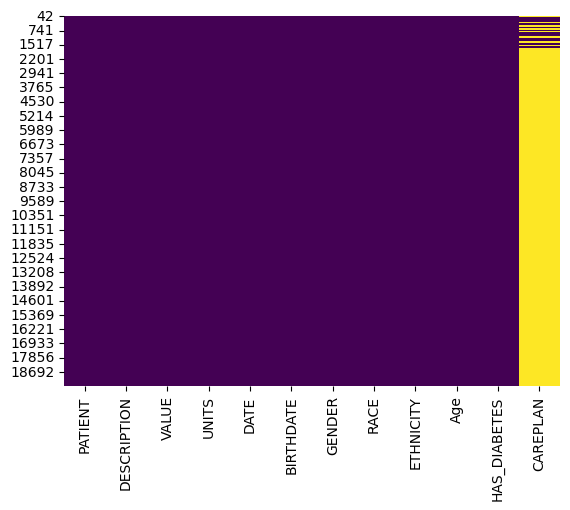

In [582]:
#Verificar que hay valores nulos y visualización
print(encounter_data_reasonFiltered.isnull().sum())
sns.heatmap(encounter_data_reasonFiltered.isnull(), cbar=False, cmap="viridis")

Es notable que no hay datos nulos salvo en la variable CAREPLAN, de donde vemos que 962 son valores no nulos y 9999 sí, además de estom, sólo tenemos datos para las primera filas (color azul marino). 

**Hipótesis de valores nulos**
<ol>
    <li>Hipótesis 1: Han acudido de forma puntual a este hospital o clínica no siendo al que están aociadas o al que suelen acudir de forma habitual.</li>
    <li>Hipótesis 2: Se trata de las primeras consultan y están en proceso de crear un diagnóstico.</li>
</ol>
Así, antes de seguir con el filtrado, vamos a pararnos a analizar qué hacemos con los datos nulas de la columna, qué impacto tienen y si genran algo de información. 

In [584]:
print("Los valores únicos que hay en CAREPLAN son:\n\n", encounter_data_reasonFiltered['CAREPLAN'].value_counts())


Los valores únicos que hay en CAREPLAN son:

 CAREPLAN
Routine antenatal care (regime/therapy)                                             378
Respiratory therapy (procedure)                                                     115
Diabetes self management plan (record artifact)                                      73
Lifestyle education regarding hypertension (procedure)                               55
Therapy (regime/therapy)                                                             37
Physiotherapy care plan (record artifact)                                            35
Infectious disease care plan (record artifact)                                       32
Wound care (regime/therapy)                                                          31
Self-care interventions (procedure)                                                  31
Care plan (record artifact)                                                          22
Musculoskeletal care (regime/therapy)                            

Vamos a ver cuántos pacientes sólo han acudido de forma puntual, ya que, aunque estén embarazadas, no tenemos mayor seguimiento de llas, con lo que 
no hay más informacióm de su progresión durante el tiempo. 

In [586]:
#Númeor de registros por cada paciente
patient_counts = encounter_data_reasonFiltered['PATIENT'].value_counts()
single_visit_patients = patient_counts[patient_counts == 1]
#Número total de pacientes con un sólo registro 

num_single_visits_patients = len(single_visit_patients)
print(f"Número de pacientes con una única visita: {num_single_visits_patients}")



Número de pacientes con una única visita: 0


La hipótesis uno queda descartada, de esta forma, los valores nulos SÍ IMPORTAN, ya que se refiere a que las pacientes
están en proceso de diagnóstico. Sin embargo, todas las mujeres deberían estar categorizadas con un tratamiento antenatal, ya que no es su única visita
y están embarazadas (vamos a pensar que estamos en un happy path y por el momento ninguna ha perdido al niño por el momento). Vamos a pensar
que por defecto se sigue el antenatal care plan, ya que todas estan embarazadas, y las etiquetas distintas son tratamientos que se llevan a parte.
De esta forma, nuestra estrategia va a ser la siguiente:
<ol>
    <li>Mujeres con diabetes: deben ser marcadas con <code>"Diabetes self management"</code>, ya que ya han sido  diagnosticadas con diabetes y deberían seguir ese tratamiento.</li>
    <li>Mujeres sin diabetes: <code>"Antenatal care"</code>.</li>
    <li>Para todas las mujeres marcada con Antenatal care, las mujeres mayores de 35 años o menos a 19 años, se las renombrará con <code>"Antenatal care with risk"</code>, ya que a partir de esta edad se les hace más pruebas.</li>
</ol>

In [588]:
# Paso1: Rellenar los valores nulos en CAREPLAN

#Mujeres con diabetes -> "Diabetes self management"
encounter_data_reasonFiltered.loc[(encounter_data_reasonFiltered['CAREPLAN'].isnull()) & (encounter_data_reasonFiltered['HAS_DIABETES'] == 1), 'CAREPLAN'] = 'Diabetes self management'

#Mujeres sin diabetes -> "Antenatal care"
encounter_data_reasonFiltered.loc[(encounter_data_reasonFiltered['CAREPLAN'].isnull()) & (encounter_data_reasonFiltered['HAS_DIABETES'] == 0), 'CAREPLAN'] = 'Antenatal care'

# Paso 2: Actualizar Antenatal care -> Antenatal care with risk para mujeres mayores de 35 años o menores de 19 años. 

encounter_data_reasonFiltered.loc[(encounter_data_reasonFiltered['CAREPLAN'] == 'Antenatal care') & ((encounter_data_reasonFiltered['Age'] > 35) | (encounter_data_reasonFiltered['Age'] < 19)), 'CAREPLAN'] = 'Antenatal care with risk'

print(encounter_data_reasonFiltered['CAREPLAN'].value_counts())

CAREPLAN
Diabetes self management                                                            11376
Antenatal care with risk                                                             3173
Antenatal care                                                                       2311
Routine antenatal care (regime/therapy)                                               378
Respiratory therapy (procedure)                                                       115
Diabetes self management plan (record artifact)                                        73
Lifestyle education regarding hypertension (procedure)                                 55
Therapy (regime/therapy)                                                               37
Physiotherapy care plan (record artifact)                                              35
Infectious disease care plan (record artifact)                                         32
Wound care (regime/therapy)                                                            31
S

In [590]:
#Verificamos si quedan valores nulos
print(encounter_data_reasonFiltered.isnull().sum())

PATIENT         0
DESCRIPTION     0
VALUE           0
UNITS           0
DATE            0
BIRTHDATE       0
GENDER          0
RACE            0
ETHNICITY       0
Age             0
HAS_DIABETES    0
CAREPLAN        0
dtype: int64


C:\Users\virginia.anton\AppData\Local\Temp\ipykernel_9652\2498344701.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='CAREPLAN',


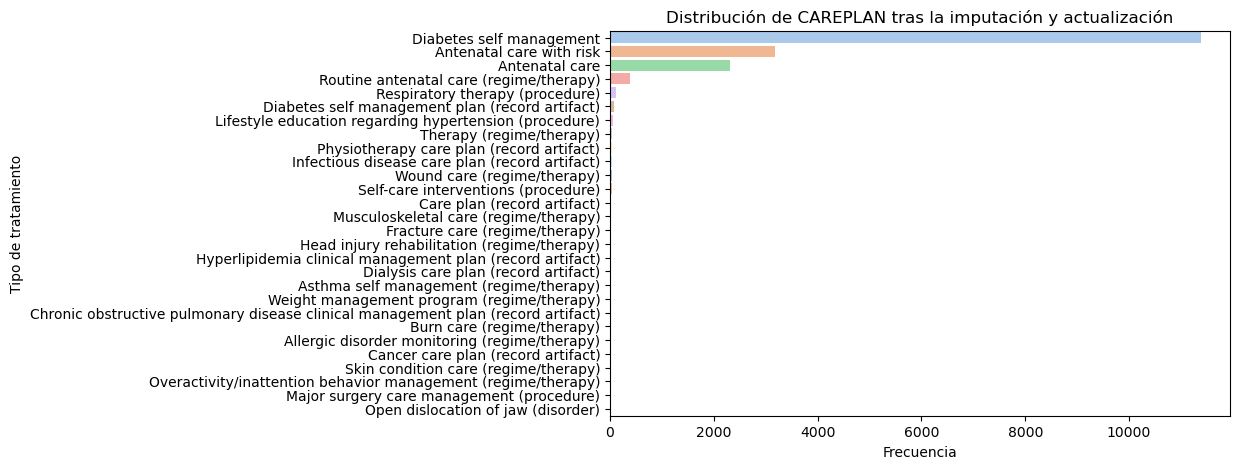

In [592]:
# Gráfico de barras para CAREPLAN
plt.figure(figsize=(8, 5))
sns.countplot(y='CAREPLAN', 
              data=encounter_data_reasonFiltered, 
              order=encounter_data_reasonFiltered['CAREPLAN'].value_counts().index, 
              palette="pastel", 
)
plt.title('Distribución de CAREPLAN tras la imputación y actualización')
plt.xlabel('Frecuencia')
plt.ylabel('Tipo de tratamiento')
plt.show()

Podemos ver que pocas mujeres de nuestra muestra son completamente sanas. 

**Corrección tipo de datos**

In [594]:
#1. Convertimos CAREPLAN en variable categorica

encounter_data_reasonFiltered['CAREPLAN'] = encounter_data_reasonFiltered['CAREPLAN'].astype('category')

# Verificar que se ha convertido correctamente
print(encounter_data_reasonFiltered['CAREPLAN'].dtypes)
print(encounter_data_reasonFiltered['CAREPLAN'].cat.categories)

category
Index(['Allergic disorder monitoring (regime/therapy)', 'Antenatal care',
       'Antenatal care with risk', 'Asthma self management (regime/therapy)',
       'Burn care (regime/therapy)', 'Cancer care plan (record artifact)',
       'Care plan (record artifact)',
       'Chronic obstructive pulmonary disease clinical management plan (record artifact)',
       'Diabetes self management',
       'Diabetes self management plan (record artifact)',
       'Dialysis care plan (record artifact)',
       'Fracture care (regime/therapy)',
       'Head injury rehabilitation (regime/therapy)',
       'Hyperlipidemia clinical management plan (record artifact)',
       'Infectious disease care plan (record artifact)',
       'Lifestyle education regarding hypertension (procedure)',
       'Major surgery care management (procedure)',
       'Musculoskeletal care (regime/therapy)',
       'Open dislocation of jaw (disorder)',
       'Overactivity/inattention behavior management (regime/ther

**Manejo de valores categóricos**

La variable HAS_DIABETES ya está codificada con la estrategia one-hot (0: ausencia de diabetes, 1: presencia).
En cambio, aunque la variable CAREPLAN sea categórica, no guarda un orden jerárquico natural y por tanto no es aconsejable que se codifique. 
Cada categoría representa un tipo de tratamiento o plan médico, y no  existe relación explícita de "mayor a menor" o 2mejor a peor". 

In [596]:
#2. Cambiamos DATE y BIRTHDATE a tipo datetime
encounter_data_reasonFiltered['DATE'] = pd.to_datetime(encounter_data_reasonFiltered['DATE'])
encounter_data_reasonFiltered['BIRTHDATE'] = pd.to_datetime(encounter_data_reasonFiltered['BIRTHDATE'])

#3. Convertimos columna VALUE a tipo numérica
encounter_data_reasonFiltered['VALUE'] = pd.to_numeric(encounter_data_reasonFiltered['VALUE'], errors='coerce')

In [598]:
# Reemplazo de la categoría inicial a Antenatal care, ya que nos habíamos equivocado
encounter_data_reasonFiltered['CAREPLAN'] = encounter_data_reasonFiltered['CAREPLAN'].replace('Routine antenatal care (regime/therapy)', 'Antenatal care')
print(encounter_data_reasonFiltered['CAREPLAN'].value_counts())

CAREPLAN
Diabetes self management                                                            11376
Antenatal care with risk                                                             3173
Antenatal care                                                                       2689
Respiratory therapy (procedure)                                                       115
Diabetes self management plan (record artifact)                                        73
Lifestyle education regarding hypertension (procedure)                                 55
Therapy (regime/therapy)                                                               37
Physiotherapy care plan (record artifact)                                              35
Infectious disease care plan (record artifact)                                         32
Wound care (regime/therapy)                                                            31
Self-care interventions (procedure)                                                    31
C

C:\Users\virginia.anton\AppData\Local\Temp\ipykernel_9652\3243192256.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  encounter_data_reasonFiltered['CAREPLAN'] = encounter_data_reasonFiltered['CAREPLAN'].replace('Routine antenatal care (regime/therapy)', 'Antenatal care')


In [600]:
#Vemos si esto afectado a alguna otra variable
encounter_data_reasonFiltered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17773 entries, 42 to 19432
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   PATIENT       17773 non-null  object             
 1   DESCRIPTION   17773 non-null  object             
 2   VALUE         16692 non-null  float64            
 3   UNITS         17773 non-null  object             
 4   DATE          17773 non-null  datetime64[ns, UTC]
 5   BIRTHDATE     17773 non-null  datetime64[ns]     
 6   GENDER        17773 non-null  object             
 7   RACE          17773 non-null  object             
 8   ETHNICITY     17773 non-null  object             
 9   Age           17773 non-null  int64              
 10  HAS_DIABETES  17773 non-null  int64              
 11  CAREPLAN      17773 non-null  category           
dtypes: category(1), datetime64[ns, UTC](1), datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 1.6+ MB


Este cambio no ha afectado a ninguna otra variable

**Análisis estadístico y visualización inicial**

Para realizar un EDA efectivo, consideremos el análisis por cada tipo de variable: categórico, numérico y datetime. 

Text(0.5, 1.0, 'Distribución HAS_DIABETES')

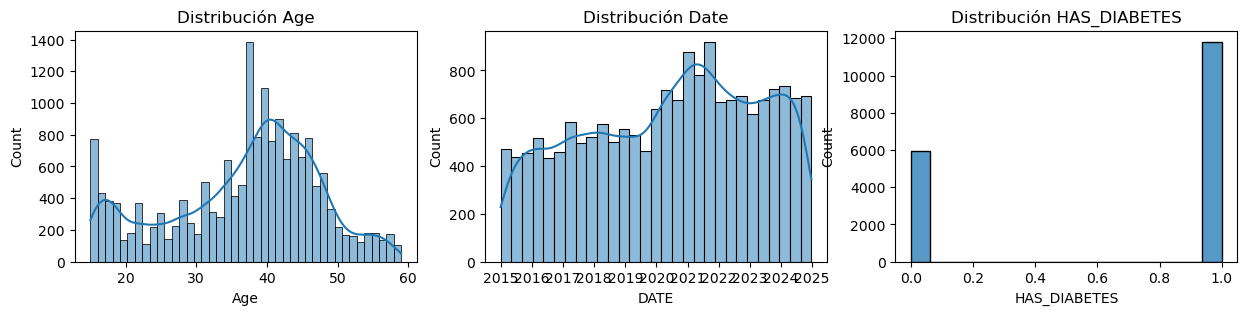

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

In [602]:
#a) Análisis distribución de datos 

fig, axes = plt.subplots(1,3, figsize=(15,3))
sns.histplot(data=encounter_data_reasonFiltered['Age'], kde=True, ax=axes[0])
axes[0].set_title('Distribución Age')

plt.figure(figsize=(8, 5))
sns.histplot(data=encounter_data_reasonFiltered['DATE'], kde=True, ax=axes[1])
axes[1].set_title('Distribución Date')

plt.figure(figsize=(8, 5))
sns.histplot(data=encounter_data_reasonFiltered['HAS_DIABETES'], ax=axes[2])
axes[2].set_title('Distribución HAS_DIABETES')

Text(0.5, 1.0, 'Distribución Date')

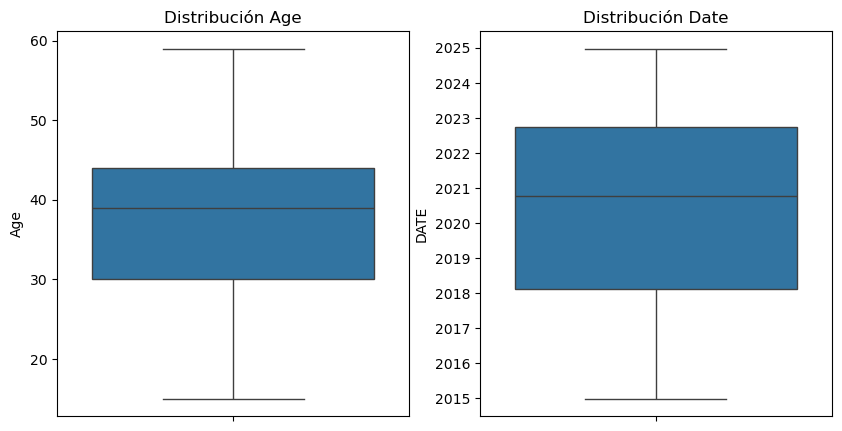

<Figure size 800x500 with 0 Axes>

In [604]:
#b) Diagramas de caja para visualizar valores atípicos

fig, axes = plt.subplots(1,2, figsize=(10,5))
sns.boxplot(data=encounter_data_reasonFiltered['Age'], ax=axes[0])
axes[0].set_title('Distribución Age')

plt.figure(figsize=(8, 5))
sns.boxplot(data=encounter_data_reasonFiltered['DATE'], ax=axes[1])
axes[1].set_title('Distribución Date')


Vamos a filtrar que sea en el periodo de fechas común con los datos del wearable. 

In [606]:
# Primera fecha registrada y última fecha registrada
date_range = (
    encounter_data_reasonFiltered['DATE'].min(),
    encounter_data_reasonFiltered['DATE'].max()
)
print(f"Rango de fechas registradas que recoge el dataset:", date_range)

Rango de fechas registradas que recoge el dataset: (Timestamp('2014-12-30 02:35:59+0000', tz='UTC'), Timestamp('2024-12-23 07:20:05+0000', tz='UTC'))


In [608]:
encounter_data_reasonFiltered.duplicated(subset=['PATIENT', 'DATE', 'DESCRIPTION'])
print(f"Número de filas duplicadas: {duplicates.sum()}")
data= encounter_data_reasonFiltered.drop_duplicates(subset=['PATIENT', 'DATE', 'DESCRIPTION'])
data.head()

Número de filas duplicadas: 70


,PATIENT,DESCRIPTION,VALUE,UNITS,DATE,BIRTHDATE,GENDER,RACE,ETHNICITY,Age,HAS_DIABETES,CAREPLAN
42,958cbaed-4a32-40ff-f2ee-d55edc4f7611,Body Height,157.6,cm,2018-11-19 23:58:08+00:00,2003-10-13,F,asian,nonhispanic,15,0,Antenatal care
43,958cbaed-4a32-40ff-f2ee-d55edc4f7611,Body Weight,54.3,kg,2018-11-19 23:58:08+00:00,2003-10-13,F,asian,nonhispanic,15,0,Antenatal care
44,958cbaed-4a32-40ff-f2ee-d55edc4f7611,Body mass index (BMI) [Ratio],21.9,kg/m2,2018-11-19 23:58:08+00:00,2003-10-13,F,asian,nonhispanic,15,0,Lifestyle education regarding hypertension (pr...
45,958cbaed-4a32-40ff-f2ee-d55edc4f7611,Body mass index (BMI) [Percentile] Per age and...,70.8,%,2018-11-19 23:58:08+00:00,2003-10-13,F,asian,nonhispanic,15,0,Antenatal care
46,958cbaed-4a32-40ff-f2ee-d55edc4f7611,Diastolic Blood Pressure,81.0,mm[Hg],2018-11-19 23:58:08+00:00,2003-10-13,F,asian,nonhispanic,15,0,Respiratory therapy (procedure)


Vamos a visualizar los valores descritos en DESCRIPTION. 

In [610]:
descriptions = encounter_data_reasonFiltered['DESCRIPTION'].unique()
print(f"Datos recogidos en las consultas: {descriptions}")

Datos recogidos en las consultas: ['Body Height' 'Body Weight' 'Body mass index (BMI) [Ratio]'
 'Body mass index (BMI) [Percentile] Per age and sex'
 'Diastolic Blood Pressure' 'Systolic Blood Pressure' 'Heart rate'
 'Glucose [Mass/volume] in Urine by Test strip'
 'Glucose [Mass/volume] in Serum or Plasma'
 'Glucose [Presence] in Urine by Test strip'
 'Glucose [Mass/volume] in Blood' 'Glucose']


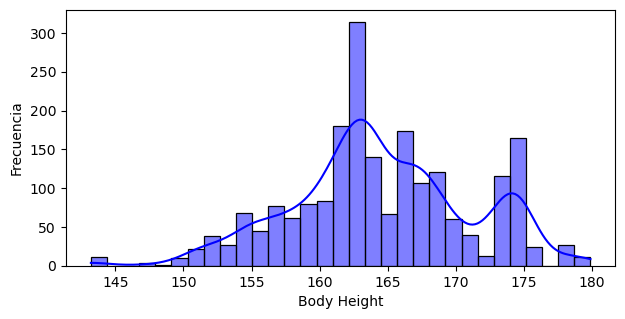

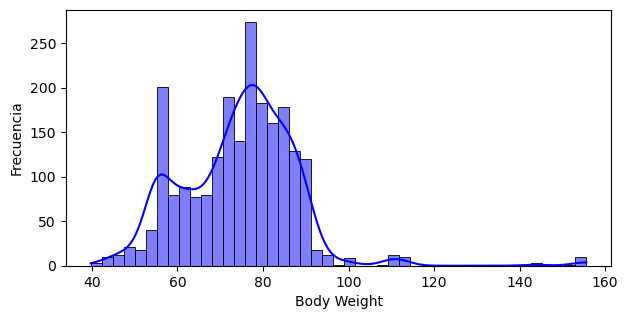

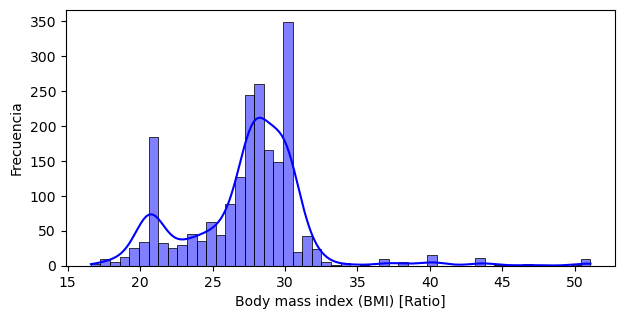

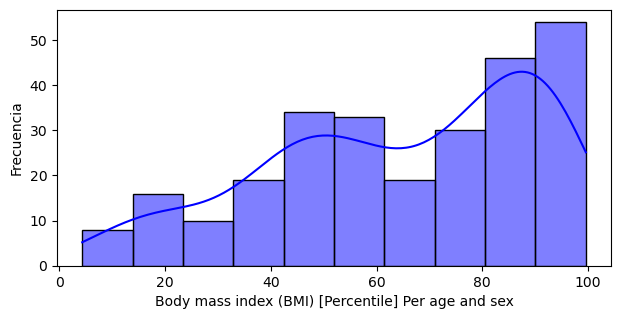

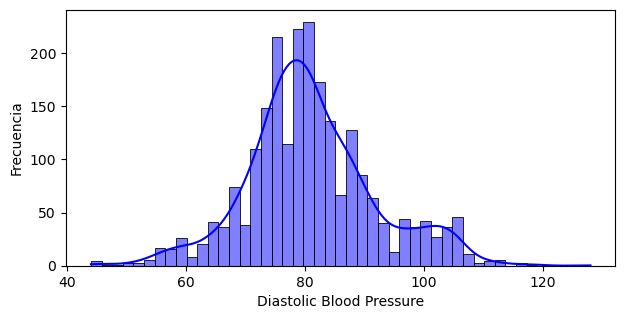

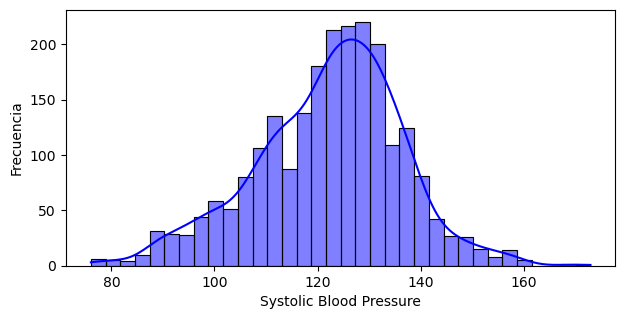

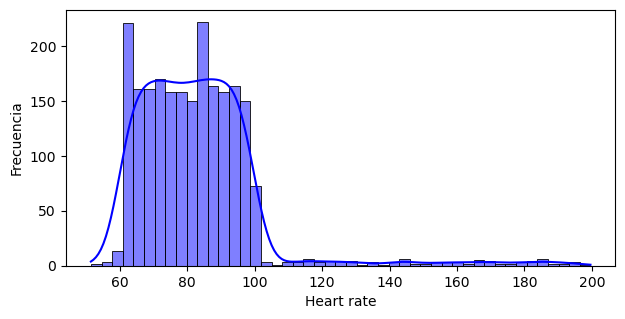

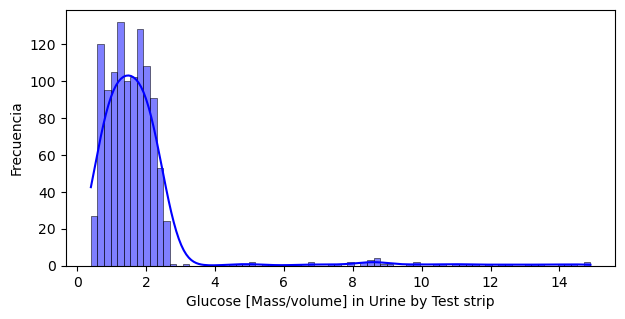

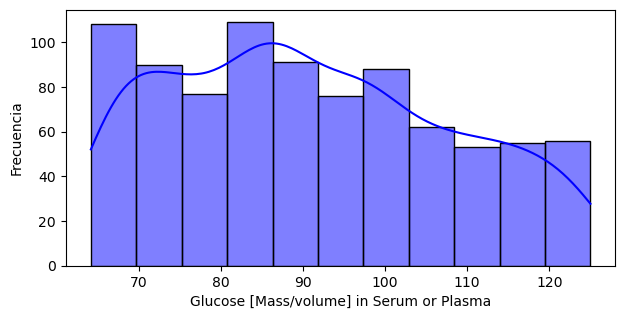

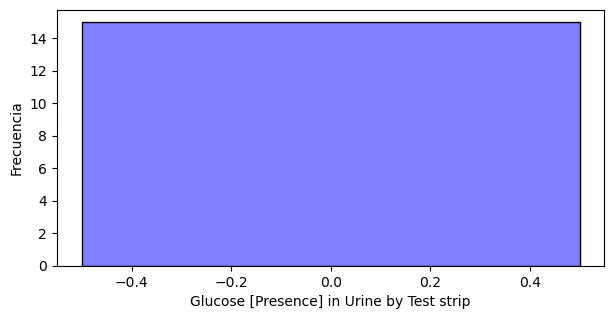

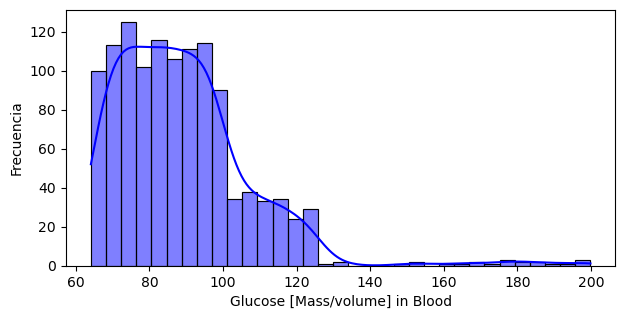

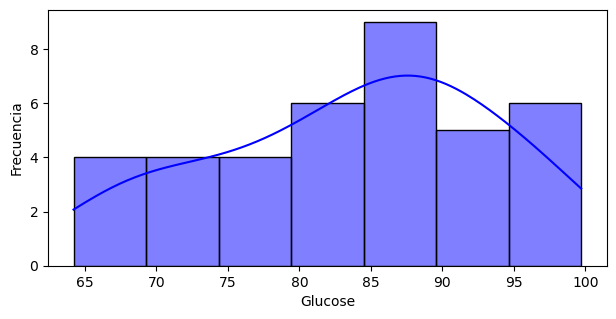

In [612]:
for desc in descriptions:
    filt = encounter_data_reasonFiltered[encounter_data_reasonFiltered['DESCRIPTION']==desc]
    if filt['VALUE'].dropna().shape[0] > 0 : #comprobar si para este dato hay signos nulos en columna VALUE. 
        plt.figure(figsize=(12,6))
        plt.subplot(2,2,1)
        sns.histplot(filt['VALUE'], kde = True, color = 'blue')
        plt.xlabel(desc)
        plt.ylabel('Frecuencia')

        plt.tight_layout()
        plt.show()
    
    

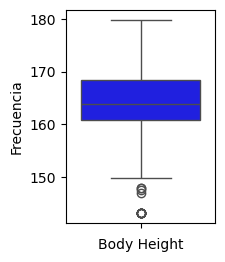

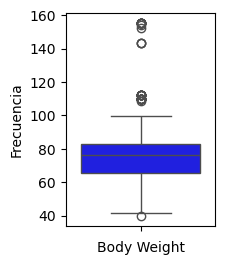

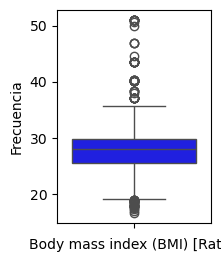

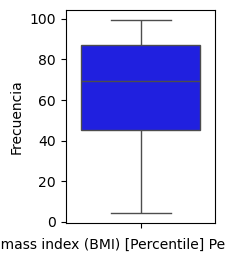

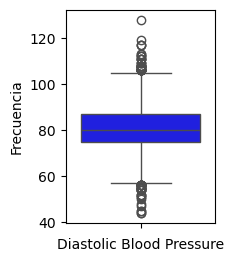

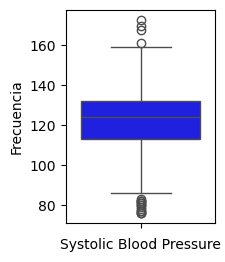

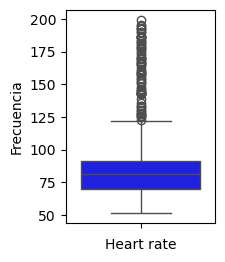

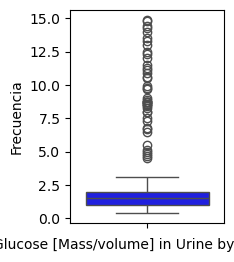

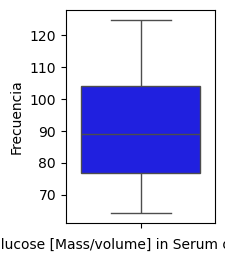

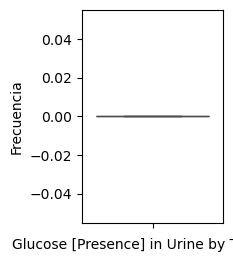

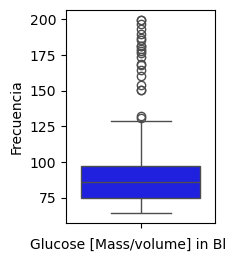

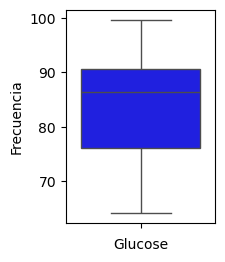

In [632]:
for desc in descriptions:
    filt = encounter_data_reasonFiltered[encounter_data_reasonFiltered['DESCRIPTION']==desc]
    if filt['VALUE'].dropna().shape[0] > 0 : #comprobar si para este dato hay signos nulos en columna VALUE. 
        plt.figure(figsize=(4,5))
        plt.subplot(2,2,1)
        sns.boxplot(filt['VALUE'], color = 'blue')
        plt.xlabel(desc)
        plt.ylabel('Frecuencia')

        plt.tight_layout()
        plt.show()

<ol>
    <li>BMI: la mayoría de las pacientes están sobrepeso (25 y 30), el peso normal es alrededor de 20-22. Hay mujeres con BMI mayor a 30, corren riesgos obstétricos.</li>
    <li>Presión diastólica: En general, está centrado entre 60-100. Los valores normales son entre 60-90, aunque uhay un apoblación significativa que tiene una presión diastóloca mayor a 90, que puede derivarse a hipertensión.</li>
    <li>La pressión sistólica se encuentra entre 80 a 160 mmHg, la mayoría se encuentran de 110 a 140 mmHg, lo cual corresponde al rango normal de presión sistólica arterial. Aunque se observa unas ligeras colas a los extremos, en el rangi hipertensivos e hipotensivos. </li>
    <li>Frecuencia cardíaca: observamos un tango esperado, normal, entre 70-90bpm, los casos mayores a 100 bpm requerirían de monitoreo adicional, ya que pueden estar asociados a complicaciones. </li>
</ol>

**Tratamiento  de Outliers**

Vamos a proceder a eliminar los valores que no son compatibles con la vida, ya que los putliers en este contexto pueden significar o derivar a algún síntoma de alguna condición o patología, y por tanto, nos gustatía que nuestro modelo sepa identificar. 

In [655]:
df = encounter_data_reasonFiltered.copy()
df.head()

,PATIENT,DESCRIPTION,VALUE,UNITS,DATE,BIRTHDATE,GENDER,RACE,ETHNICITY,Age,HAS_DIABETES,CAREPLAN
42,958cbaed-4a32-40ff-f2ee-d55edc4f7611,Body Height,157.6,cm,2018-11-19 23:58:08+00:00,2003-10-13,F,asian,nonhispanic,15,0,Antenatal care
43,958cbaed-4a32-40ff-f2ee-d55edc4f7611,Body Weight,54.3,kg,2018-11-19 23:58:08+00:00,2003-10-13,F,asian,nonhispanic,15,0,Antenatal care
44,958cbaed-4a32-40ff-f2ee-d55edc4f7611,Body mass index (BMI) [Ratio],21.9,kg/m2,2018-11-19 23:58:08+00:00,2003-10-13,F,asian,nonhispanic,15,0,Lifestyle education regarding hypertension (pr...
45,958cbaed-4a32-40ff-f2ee-d55edc4f7611,Body mass index (BMI) [Percentile] Per age and...,70.8,%,2018-11-19 23:58:08+00:00,2003-10-13,F,asian,nonhispanic,15,0,Antenatal care
46,958cbaed-4a32-40ff-f2ee-d55edc4f7611,Diastolic Blood Pressure,81.0,mm[Hg],2018-11-19 23:58:08+00:00,2003-10-13,F,asian,nonhispanic,15,0,Respiratory therapy (procedure)


In [661]:
#rangos a filtrar
ranges = {
    'Heart rate': (40, 200),
    'Systolic Blood Pressure': (70, 250),
    'Diastolic Blood Pressure': (40,140), 
    'Body mass index (BMI) [Ratio]': (10,60), 
    'Glucose [Mass/volume] in Blood': (70, 140)
}

#Aplicar filtros basados en description
# Filtrar filas fuera del rango y mostrar cuáles son eliminadas
for description, (lower, upper) in ranges.items():
    df = df[~((df['DESCRIPTION'] == description) &
          ((df['VALUE'] < lower) | (df['VALUE'] > upper)))]

#vemos resultado

print(f"Tamaño original: {encounter_data_reasonFiltered.shape[0]}")
print(f"Tamaño tras filtrado outliers:{df.shape[0]}")

Tamaño original: 17773
Tamaño tras filtrado outliers:17604


## Correlaciones

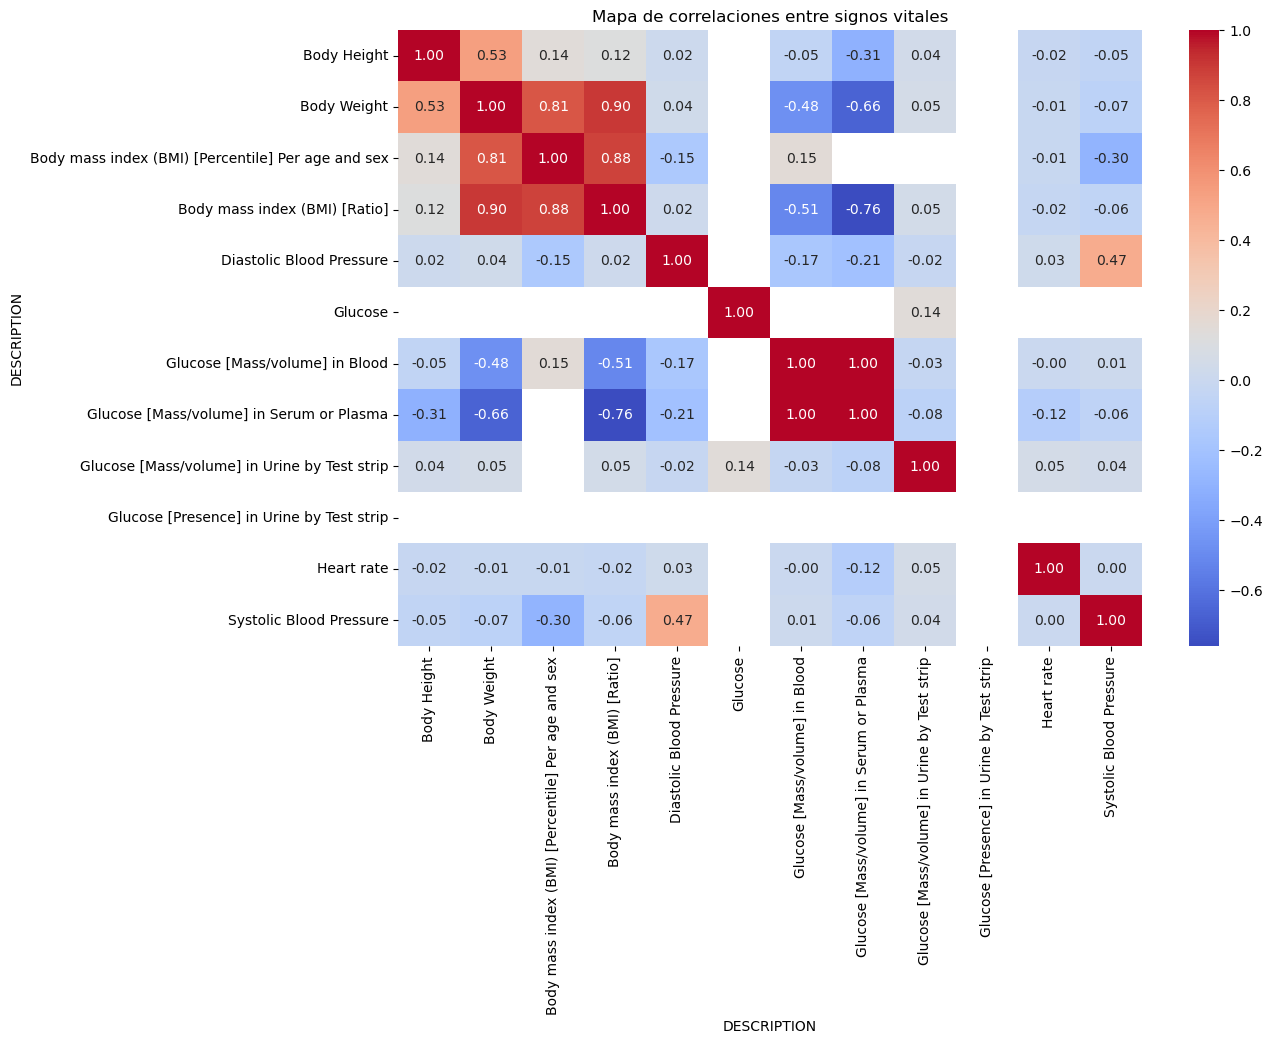

In [672]:
# Crear un índice combinado con PATIENT y DATE
df['PATIENT_DATE'] = df['PATIENT'].astype(str) + "_" + df['DATE'].astype(str)

# Pivotear usando el índice combinado
df_pivot = df.pivot(index='PATIENT_DATE', columns='DESCRIPTION', values='VALUE')

# Calcular la matriz de correlación
correlation_matrix = df_pivot.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de correlaciones entre signos vitales')
plt.show()


La única correlación que vemos notable y no esperada es la correlación negativa entre la Glucosa y BMI, ya que nos esperabamos
que tuvieran una relación positiva. Al igual que el peso y la presión arterial, que no están relacionadas. 

## Número de visitas por usuario

In [682]:
visits_per_user=df.groupby('PATIENT').size()
mean_visits= visits_per_user.mean()
print(f"Número medio de visitas por usuario:{mean_visits}")
print(visits_per_user.describe())

Número medio de visitas por usuario:80.01818181818182
count     220.000000
mean       80.018182
std       162.504990
min        14.000000
25%        30.000000
50%        46.000000
75%        68.000000
max      1818.000000
dtype: float64


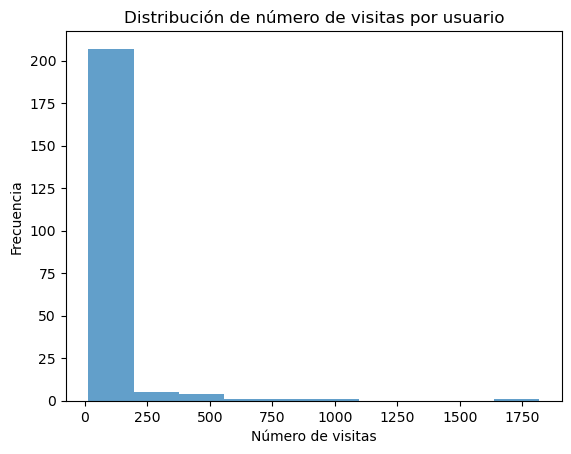

In [689]:
plt.hist(visits_per_user, alpha=0.7)
plt.title("Distribución de número de visitas por usuario")
plt.xlabel("Número de visitas")
plt.ylabel("Frecuencia")
plt.show()

Observamos que tenemos un número suficiente de visitas para hacer el seguimiento. Un embarazo normal requiere unas 10 visitas, 
de forma que posiblemente estas se deben a alguna complicación asociada. 

In [691]:
df.to_csv('syntheaFILTERED')